In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [40]:
np.random.seed(10)
x = np.random.random((10, 2))
res = [ (np.percentile(x, 99) - i)**2 for i in x]
res2 = [ (i - np.min(x))**2 for i in x]

In [41]:
x

array([[0.77132064, 0.02075195],
       [0.63364823, 0.74880388],
       [0.49850701, 0.22479665],
       [0.19806286, 0.76053071],
       [0.16911084, 0.08833981],
       [0.68535982, 0.95339335],
       [0.00394827, 0.51219226],
       [0.81262096, 0.61252607],
       [0.72175532, 0.29187607],
       [0.91777412, 0.71457578]])

In [42]:
res2

[array([5.88860365e-01, 2.82363763e-04]),
 array([0.39652205, 0.55480989]),
 array([0.24458835, 0.04877401]),
 array([0.03768048, 0.572417  ]),
 array([0.02727867, 0.00712193]),
 array([0.4643217 , 0.90144596]),
 array([0.        , 0.25831196]),
 array([0.65395153, 0.37036694]),
 array([0.51524696, 0.08290242]),
 array([0.8350777 , 0.50499147])]

In [34]:
res

[array([0.03073186, 0.85724219]),
 array([0.09795489, 0.03913347]),
 array([0.20081035, 0.52103717]),
 array([0.56034631, 0.03463134]),
 array([0.60452935, 0.73665465]),
 array([6.82598576e-02, 4.58011204e-05]),
 array([0.88864073, 0.18873241]),
 array([0.01795727, 0.11162256]),
 array([0.05056669, 0.42869707]),
 array([0.00083241, 0.05384716])]

In [36]:
x

array([[0.77132064, 0.02075195],
       [0.63364823, 0.74880388],
       [0.49850701, 0.22479665],
       [0.19806286, 0.76053071],
       [0.16911084, 0.08833981],
       [0.68535982, 0.95339335],
       [0.00394827, 0.51219226],
       [0.81262096, 0.61252607],
       [0.72175532, 0.29187607],
       [0.91777412, 0.71457578]])

In [99]:
data = pd.read_excel("/Users/farateod/Desktop/PhenoGraph_evaluation_NKI/classification_input_data_logtrans_01norm_10.xlsx", index_col="Unnamed: 0")

In [102]:
data.columns

Index(['cosine_similarity', 'classification', 'silhouette_score',
       'calinski_harabasz_score', 'davies_bouldin_score'],
      dtype='object')

In [104]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)
transformed_data = scaler.transform(data)
transformed_data = pd.DataFrame(transformed_data)
transformed_data = transformed_data.set_index(data.index)
transformed_data = transformed_data.rename(columns={0: 'cosine_similarity', 1: 'classification', 2: "silhouette_score", 3: "calinski_harabasz_score", 4: "davies_bouldin_score"})


In [108]:
transformed_data

,cosine_similarity,classification,silhouette_score,calinski_harabasz_score,davies_bouldin_score
20,1.000000,1.000000,0.000000,0.000000,1.000000
30,0.907889,0.824818,0.493179,0.422895,0.830084
40,0.928606,0.933932,0.264104,0.332721,0.652381
60,0.280032,0.159765,1.000000,0.722498,0.000000
80,0.212343,0.037579,0.334293,0.103486,0.625394
100,0.000000,0.000000,0.325533,1.000000,0.891578
120,0.583162,0.527040,0.440065,0.429470,0.540994


In [109]:
transformed_data["davies_bouldin_score"] = transformed_data["davies_bouldin_score"]*(-1)+1

In [110]:
transformed_data

,cosine_similarity,classification,silhouette_score,calinski_harabasz_score,davies_bouldin_score
20,1.000000,1.000000,0.000000,0.000000,0.000000
30,0.907889,0.824818,0.493179,0.422895,0.169916
40,0.928606,0.933932,0.264104,0.332721,0.347619
60,0.280032,0.159765,1.000000,0.722498,1.000000
80,0.212343,0.037579,0.334293,0.103486,0.374606
100,0.000000,0.000000,0.325533,1.000000,0.108422
120,0.583162,0.527040,0.440065,0.429470,0.459006


In [91]:
x_data = data["Unnamed: 0"]

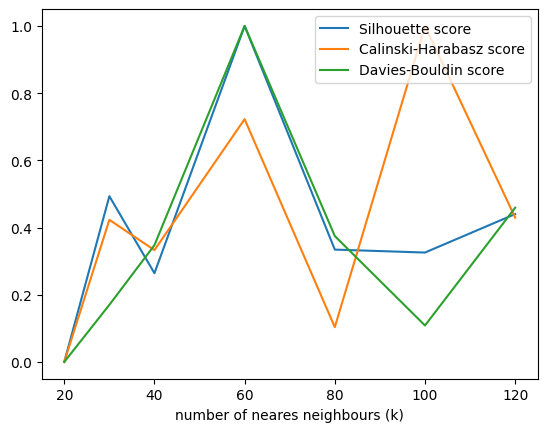

In [115]:
#plt.plot(x_data, transformed_data["cosine_similarity"], label = "cosine_similarity")
#plt.plot(x_data, transformed_data["classification"], label = "classification")
plt.plot(x_data, transformed_data["silhouette_score"], label = "Silhouette score")
plt.plot(x_data, transformed_data["calinski_harabasz_score"], label = "Calinski-Harabasz index")
plt.plot(x_data, transformed_data["davies_bouldin_score"], label = "Davies-Bouldin score")
plt.xlabel('number of neares neighbours (k)', fontsize=10)
plt.legend()
plt.show()

In [ ]:
x

In [61]:
labels = pd.read_csv("/Users/farateod/Documents/GitHub/tribus/tests/sample2/cell_type_calling/2022-10-04_09-46/labels_TMA_data_all_markers_HR_status_included.csv")
labels = labels.drop('Unnamed: 0', axis = 1)

In [77]:
df = pd.DataFrame()
df.empty

True

In [67]:
labels_tumor = labels.loc[labels['Global'] == "Tumor"]
indeces = list(labels_tumor.index)

In [69]:
data = pd.read_csv("/Users/farateod/Documents/GitHub/tribus/tests/sample2/quantification/TMA_data_all_markers_HR_status_included.csv")
data = data.drop('Unnamed: 0', axis = 1)

In [76]:
data.loc[indeces, :]

,CD11c,BP53_1,CD1c,CD4,CD3d,CD20,CD163,CD57,CD8a,cCasp3,...,PDL1,IBA1,FOXP3,PD1,Ecadherin,vimentin,CD31,P21,CK7,CD45
4,0.368689,0.364153,0.390079,0.380691,0.202181,0.179285,0.536368,0.299982,0.224773,0.442541,...,0.355165,0.312594,0.255085,0.264787,0.279302,0.357662,0.173623,0.266651,0.124828,0.202403
15,0.378448,0.270413,0.377992,0.386888,0.219997,0.180482,0.577177,0.314588,0.222086,0.457831,...,0.365158,0.354634,0.275519,0.271675,0.283362,0.282934,0.281927,0.279621,0.153003,0.204093
16,0.421872,0.601432,0.376622,0.385759,0.196140,0.205790,0.450352,0.358058,0.229449,0.409590,...,0.348843,0.346165,0.227690,0.265903,0.409320,0.439590,0.130875,0.245872,0.313690,0.202650
22,0.377617,0.325625,0.391238,0.387973,0.222133,0.187747,0.572778,0.325907,0.220907,0.459210,...,0.367640,0.360841,0.280569,0.265902,0.284342,0.326090,0.358679,0.278457,0.151083,0.199270
72,0.465760,0.638357,0.413921,0.396548,0.211989,0.222507,0.480157,0.409515,0.224252,0.434012,...,0.359383,0.466860,0.247436,0.269105,0.635056,0.502108,0.143859,0.264117,0.259525,0.230091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120714,0.498045,0.627332,0.428417,0.509923,0.255926,0.321276,0.513615,0.462480,0.327466,0.462940,...,0.384216,0.458954,0.273239,0.293853,0.572899,0.232459,0.130085,0.263660,0.515627,0.225335
120715,0.524770,0.786673,0.604058,0.482285,0.254692,0.309838,0.368473,0.332083,0.325185,0.437931,...,0.384939,0.504265,0.238658,0.280660,0.629223,0.364283,0.120974,0.261435,0.887218,0.231664
120716,0.473245,0.601860,0.424772,0.510118,0.266186,0.308087,0.441347,0.327214,0.349416,0.475663,...,0.379687,0.464703,0.258163,0.285716,0.731763,0.535269,0.122773,0.273236,0.824858,0.225433
120717,0.470263,0.746125,0.572032,0.509260,0.252423,0.265678,0.418549,0.373255,0.365687,0.462354,...,0.376880,0.556124,0.253442,0.277023,0.745394,0.425761,0.124825,0.269743,0.841827,0.227089


In [37]:
def buildTree(file, cell_types_per_level, sheet_name, sheet_names, depth, current_depth):
    if current_depth > depth:
        return
    sheet = pd.read_excel(file, sheet_name=sheet_name)
    cell_types = sheet.columns[1:]
    for i in cell_types:
        if i in sheet_names:
            if current_depth in cell_types_per_level:
                cell_types_per_level[current_depth].append(i)
            else:
                cell_types_per_level[current_depth] = [i]
            buildTree(file, cell_types_per_level, i, sheet_names, depth, current_depth+1)

In [38]:
def buildTree_from_file(file, depth):
    cell_types_per_level = {}
    xl = pd.ExcelFile(file)
    sheet_names = xl.sheet_names
    cell_types_per_level[0] = sheet_names[0]
    buildTree(file, cell_types_per_level, sheet_names[0], sheet_names, depth, 1)
    return cell_types_per_level

In [39]:
file = '/Users/farateod/Documents/GitHub/tribus/tests/sample2/cell_type_calling/cell_type_descriptions.xlsx'
cell_types_per_level = {}
cell_types_per_level = buildTree_from_file(file, 3)

In [40]:
cell_types_per_level

{0: 'Global',
 1: ['Tumor', 'Myeloid', 'Lymphoid', 'Stromal'],
 2: ['Mesenchymal',
  'EMT',
  'CD163+ Macrophage',
  'Neutrophils',
  'B cells',
  'CD4 T cells',
  'Epithelial stromal',
  'Endothelial',
  'Mesenchymal stroma']}

In [41]:
def buildTree1(file, graph, sheet_name, sheet_names, depth, current_depth):
    if current_depth > depth:
        return
    sheet = pd.read_excel(file, sheet_name=sheet_name)
    cell_types = sheet.columns[1:]
    for i in cell_types:
        if i in sheet_names:
            graph.add_edge(sheet_name, i)
            buildTree1(file, graph, i, sheet_names, depth, current_depth+1)

In [42]:
def buildTree_from_file1(file, depth):
    graph = nx.DiGraph()
    xl = pd.ExcelFile(file)
    sheet_names = xl.sheet_names
    graph.add_node(sheet_names[0])
    buildTree1(file, graph, sheet_names[0], sheet_names, depth, 1)
    return graph

In [43]:
file = '/Users/farateod/Documents/GitHub/tribus/tests/sample2/cell_type_calling/cell_type_descriptions.xlsx'
graph = buildTree_from_file1(file, 3)

In [44]:
import networkx as nx
import random
def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):

        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)
        if len(children)!=0:
            dx = width/len(children)
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap,
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos


    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)

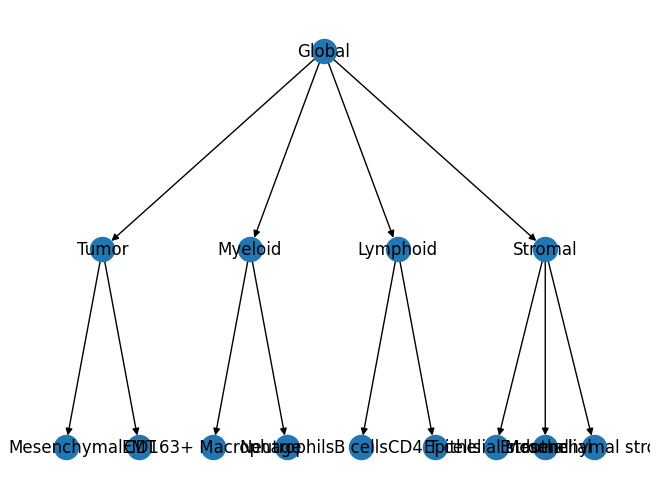

In [45]:
pos = hierarchy_pos(graph, "Global", vert_gap=0.5)
nx.draw(graph, pos=pos, with_labels=True)

In [50]:
def graph_traversal(graph, node):
    if 1<2: #if the cell type description is the same
        # TODO save the data
        print(node)
        out_edges = graph.out_edges(node)
        for i, j in out_edges:
            graph_traversal(graph, j)

In [51]:
graph_traversal(graph, 'Global')

Global
Tumor
Mesenchymal
EMT
Myeloid
CD163+ Macrophage
Neutrophils
Lymphoid
B cells
CD4 T cells
Stromal
Epithelial stromal
Endothelial
Mesenchymal stroma


In [58]:
a = [1,2,3,4,5,6]
a[1:]

[2, 3, 4, 5, 6]